This script aims at generating input files to be used as inputs to the CMD. Starting from the ZINC lead-like clean compounds (clle.smi), it applies divsamp0 to create an orthogonal subset. It adds properties to the molecules and save as csv file (div0le.csv). In parallel, it creates a control csv file with the first 310K clustered molecules of the ZINC lead-like clean compounds (clusle.csv); this file is supposed to have much lower diversity since we are using the largest clusters from clle.smi. 

The same process is done but starting from the ZINC drug-like clean compounds (cldr.smi)

In [1]:
# Import myfunc at cix folder
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../cix')
import myfuncs as mf
import pandas as pd
from rdkit.Chem import rdBase, RDConfig
from rdkit import Chem
rdBase.DisableLog('rdApp.*') # To make rdkit silent
from rdkit.Chem import PandasTools as pt
from rdkit.Chem import Descriptors
import numpy as np
import chemfp
import csv
import time
import os

/home/gcolmenarejo/anaconda3/envs/cix/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [ ]:
####################################################
### LEADS orthogonal file
####################################################

## First import ZINC SMILES file and generate the corresponding arena

start = time.time()

smidfl = mf.smisf2smidf("./clle.smi", noid = False, random = True, seed = 123)

arl = mf.smidf2arena(smidfl)

end = time.time()

eltime = end - start

print('Total time: ' + time.strftime("%H:%M:%S", time.gmtime(eltime)))

In [3]:
## Apply divsamp0 to generate an orthogonal set of 310K molecules

sell = mf.divsamp0(arl, nlimit = 310000)

i=4591274; nsel=310000; nneig=3685062; Sampling time: 12:14:04


In [4]:
# Add ids and save as SMILES file

nids = [arl.ids[x] for x in sell]
smidfl[smidfl.id.isin(nids)].to_csv("div0le.smi", index = False, sep = " ", header = False)

In [5]:
# Create with these molecules a csv file with properties to be able to run CMD
# This is a similiar process to the one used in GenerateNP in exp3

data = pd.read_csv("./div0le.smi", header = None, names = ['smiles'])

# Create mol objects
data['mol'] = data['smiles'].apply(Chem.MolFromSmiles)

# Create column with non-isomeric SMILES (we'll use that)
data["smi"] = data['mol'].apply(Chem.MolToSmiles, isomericSmiles=False)

# Generate properties and add to dataframe
data['mw'] = data['mol'].apply(Descriptors.MolWt)
data['logp'] = data['mol'].apply(Descriptors.MolLogP)
data['qed'] = data['mol'].apply(Descriptors.qed)

# Delete column of mol objects
del data['mol']

# Save csv file with non-isomeric smiles and properties
data[["smi","mw","logp","qed"]].to_csv('./div0le.csv', index = False)

In [2]:
####################################################
### LEADS clustered file
####################################################

# We generate a dataframe with smiles from the zinc lead-like clean group of molecules. 
smidfl = mf.smisf2smidf("./clle.smi", noid = False)

# We cluster the molecules
cls = mf.clusmidf(smidfl)

Clustering time: 08:54:08


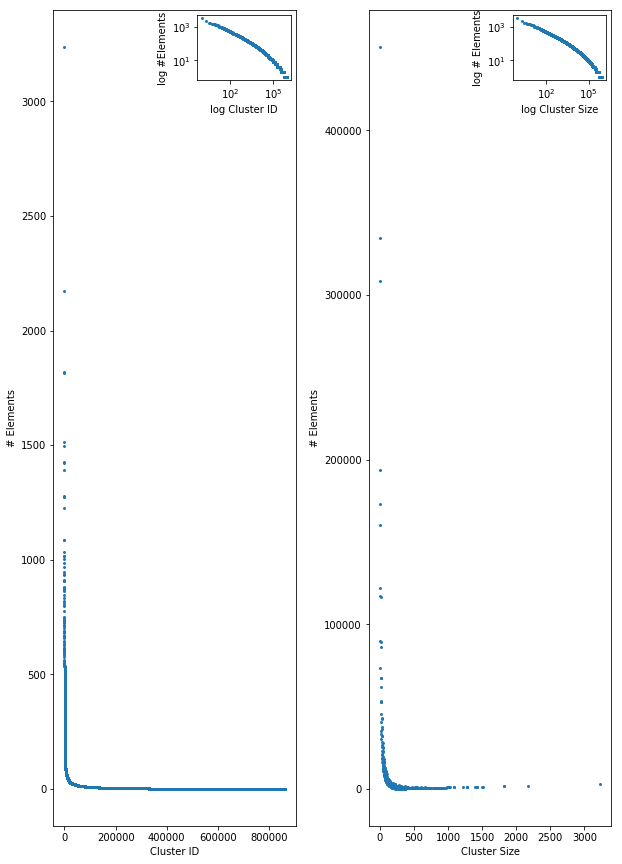

In [3]:
# Plot the clusters distribution
mf.plotmulticlus([cls],  10, 10)

In [4]:
# Generate the flat list of molecules
flat_cls = [i for cl in cls for i in cl]

# Add ids and save as SMILES file
nids = [arl.ids[x] for x in flat_cls[:310000]]
smidfl[smidfl.id.isin(nids)].to_csv("clusle.smi", index = False, sep = " ", header = False)

NameError: name 'arl' is not defined

In [ ]:
# Create with these molecules a csv file with properties to be able to run CMD
# This is a similiar process to the one used in GenerateNP in exp3

data = pd.read_csv("./clusle.smi", header = None, names = ['smiles'])

# Create mol objects
data['mol'] = data['smiles'].apply(Chem.MolFromSmiles)

# Create column with non-isomeric SMILES (we'll use that)
data["smi"] = data['mol'].apply(Chem.MolToSmiles, isomericSmiles=False)

# Generate properties and add to dataframe
data['mw'] = data['mol'].apply(Descriptors.MolWt)
data['logp'] = data['mol'].apply(Descriptors.MolLogP)
data['qed'] = data['mol'].apply(Descriptors.qed)

# Delete column of mol objects
del data['mol']

# Save csv file with non-isomeric smiles and properties
data[["smi","mw","logp","qed"]].to_csv('./clusle.csv', index = False)

In [ ]:
####################################################
### DRUGS orthogonal file
####################################################

start = time.time()

smidfd = mf.smisf2smidf("./cldr.smi", noid = False, random = True, seed = 123)

ard = mf.smidf2arena(smidfd)

end = time.time()

eltime = end - start

print('Total time: ' + time.strftime("%H:%M:%S", time.gmtime(eltime)))

In [ ]:
## Apply divsamp0 to generate an orthogonal set of 310K molecules

seld = mf.divsamp0(ard, nlimit = 310000)

In [ ]:
# Add ids and save as SMILES file

nids = [ard.ids[x] for x in seld]
smidfd[smidfd.id.isin(nids)].to_csv("div0dr.smi", index = False, sep = " ", header = False)

In [ ]:
# Create with these molecules a csv file with properties to be able to run CMD
# This is a similiar process to the one used in GenerateNP in exp3

data = pd.read_csv("./div0dr.smi", header = None, names = ['smiles'])

# Create mol objects
data['mol'] = data['smiles'].apply(Chem.MolFromSmiles)

# Create column with non-isomeric SMILES (we'll use that)
data["smi"] = data['mol'].apply(Chem.MolToSmiles, isomericSmiles=False)

# Generate properties and add to dataframe
data['mw'] = data['mol'].apply(Descriptors.MolWt)
data['logp'] = data['mol'].apply(Descriptors.MolLogP)
data['qed'] = data['mol'].apply(Descriptors.qed)

# Delete column of mol objects
del data['mol']

# Save csv file with non-isomeric smiles and properties
data[["smi","mw","logp","qed"]].to_csv('./div0dr.csv', index = False)

In [ ]:
####################################################
### DRUGS clustered file
####################################################

# We generate a dataframe with smiles from the zinc lead-like clean group of molecules. 
smidfd = mf.smisf2smidf("./cldr.smi", noid = False)

# We cluster the molecules
cls = mf.clusmidf(smidfd)

In [ ]:
# Plot the clusters distribution
mf.plotmulticlus([cls],  10, 15)

In [ ]:
# Generate the flat list of molecules
flat_cls = [i for cl in cls for i in cl]

# Add ids and save as SMILES file
nids = [ard.ids[x] for x in flat_cls[:310000]]
smidfd[smidfd.id.isin(nids)].to_csv("clusdr.smi", index = False, sep = " ", header = False)

In [ ]:
# Create with these molecules a csv file with properties to be able to run CMD
# This is a similiar process to the one used in GenerateNP in exp3

data = pd.read_csv("./clusdr.smi", header = None, names = ['smiles'])

# Create mol objects
data['mol'] = data['smiles'].apply(Chem.MolFromSmiles)

# Create column with non-isomeric SMILES (we'll use that)
data["smi"] = data['mol'].apply(Chem.MolToSmiles, isomericSmiles=False)

# Generate properties and add to dataframe
data['mw'] = data['mol'].apply(Descriptors.MolWt)
data['logp'] = data['mol'].apply(Descriptors.MolLogP)
data['qed'] = data['mol'].apply(Descriptors.qed)

# Delete column of mol objects
del data['mol']

# Save csv file with non-isomeric smiles and properties
data[["smi","mw","logp","qed"]].to_csv('./clusdr.csv', index = False)